<a href="https://colab.research.google.com/github/jasimrashid/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# sales as numpy
# sales = np.array([3505,24400,3027,2798,3700,3250,2689])

#sales as list
sales = [3505,2440,3027,2798,3700,3250,2689]

# sales=[37,57,25,55,48]



In [0]:
# mean of list
def list_mean(listname):
  list_total = 0
  for i in listname:
    list_total += i
  return (list_total/len(listname))

# std deviation of list
def list_std(listname):
  listmean = list_mean(listname)
  numerator = 0
  n = len(listname)
  for i in listname:
    numerator += (i-listmean)**2
  denominator = n-1
  return ((numerator/denominator)**0.5)


In [48]:
print("Mean of sales: ", list_mean(sales))
print("Standard deviation of sales: ", list_std(sales))

Mean of sales:  3058.4285714285716
Standard deviation of sales:  453.7770587497996


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [54]:
customers = [127,80,105,92,120,115,93]
df = pd.DataFrame({"sales": sales, "customers": customers})
df.cov()

,sales,customers
sales,205913.619048,7440.547619
customers,7440.547619,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [95]:
# Standard deviation of customers
print("Standard deviation of customers: ", list_std(customers),"\n")
cov = df.cov()
std = np.array([[list_std(sales)**2,list_std(sales)*list_std(customers)],
                [list_std(sales)*list_std(customers), list_std(customers)**2]])

# Correlation matrix
cov = cov.to_numpy()
corr = pd.DataFrame(cov/std)
print("Correlation matrix: ")
corr


Standard deviation of customers:  17.057326313123664 

Correlation matrix: 


,0,1
0,1.000000,0.961283
1,0.961283,1.000000


In [86]:
# Testing
df.corr()

,sales,customers
sales,1.000000,0.961283
customers,0.961283,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
data_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(data_url)

In [98]:
# Variance covariance matrix
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [99]:
# Correlation matrix
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

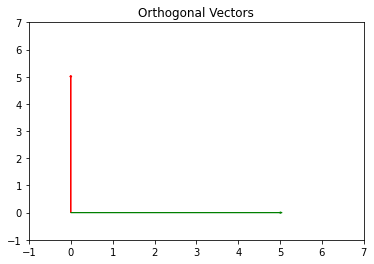

In [104]:
v1 = [0,5]
v2 = [5,0]

plt.arrow(0,0, v1[0], v1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,7)          
plt.ylim(-1,7)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [108]:
# Two vectors are orthogonal to each other if their dot product will be zero.
a = np.array([-5,3,7])
b = np.array([6,-8,2])
if np.dot(a,b)==0:
  print("Product of two arrrays = ", 0)
  print("Vectors are orthogonal")
else:
  print("Product of two arrrays = ", np.dot(a,b))
  print("Vectors are not orthogonal")


Product of two arrrays =  -40
Vectors are not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])

In [132]:
# Norm of c

c_norm = np.sqrt((c**2).sum())
# print(np.linalg.norm(c))
c_dot_c = np.dot(c,c)
c_T_times_c = np.dot(c.T, c)

print("Norm of c: ", c_norm)
print("c dot c: ", c_dot_c)
# print("c dot c: ", np.vdot(c,c))
print("c-transposed dot c: ", c_T_times_c)

# print("\nThese quantities have")



Norm of c:  25.787593916455254
c dot c:  665
c-transposed dot c:  665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
d=
\begin{bmatrix}
7  \\
12
\end{bmatrix} = 2
\begin{bmatrix}
1  \\
12
\end{bmatrix} + 3
\begin{bmatrix}
0  \\
1
\end{bmatrix} = 2\hat{i} + 3\hat{j}
\end{align}

\begin{align}
e = 
\begin{bmatrix}
2 \\
11 \\
-8
\end{bmatrix} = 2
\begin{bmatrix}
1  \\
0  \\
0
\end{bmatrix} + 11
\begin{bmatrix}
0  \\
1  \\
0
\end{bmatrix} - 8
\begin{bmatrix}
0  \\
0  \\
1
\end{bmatrix} = 2\hat{i} + 11\hat{j} + 11\hat{k}
\end{align}




## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [128]:
f = np.array([4,12,11,9,2])
f_norm = np.sqrt((f**2).sum())
f_hat = (1/f_norm)*f
print("f_norm: ", f_norm)
print("f_hat: ", f_hat)

19.131126469708992
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

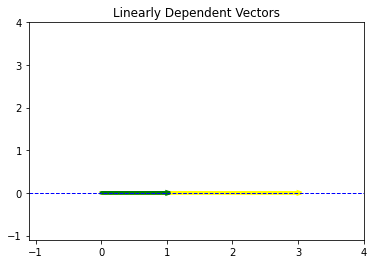

In [134]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
# v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
# plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

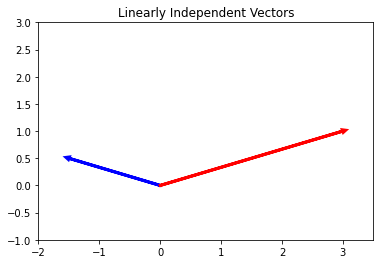

In [135]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [138]:
g = np.array([1,2])
h = np.array([4,8])
g_h = np.array([[1,2],[4,8]])

np.linalg.matrix_rank(g_h)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [139]:
g = np.array([1,2])
h = np.array([4,8])
l_m_n = np.array([[1,2,3],[-1,0,7],[4,8,2]])

np.linalg.matrix_rank(g_h)

1

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



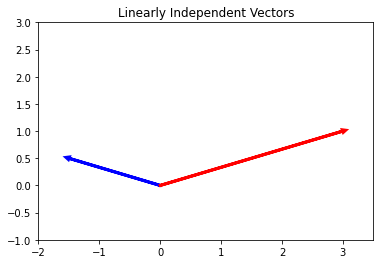

In [140]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

Forming a basis is define a set of vectors that are linearly independent and span a vector space V, i.e. if all linear combinations of vectors fill the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [142]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

In [0]:
# Rank = 3

## 7.2 What does the rank of a matrix tell us?

The rank is the # of linearly independent vectors in the matrix. It is the dimension of the vector space spanned by its columns. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

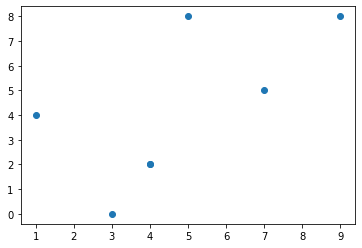

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()